In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_openml

# Load dataset
df=pd.read_csv("/boston_dataset.csv")
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:

# Define features and target
X = df.drop(columns=['MEDV'])  # 'medv' is the target variable (median home value)
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [ ]:

# Deep Neural Network Model
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define input shape
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])


In [ ]:

# Train the DNN model
dnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Predict using DNN
y_pred_dnn = dnn_model.predict(X_test).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:

# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:\nMSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")


In [ ]:
# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network")


Linear Regression Performance:
MSE: 24.2911, MAE: 3.1891, R²: 0.6688

Deep Neural Network Performance:
MSE: 9.9088, MAE: 1.9298, R²: 0.8649



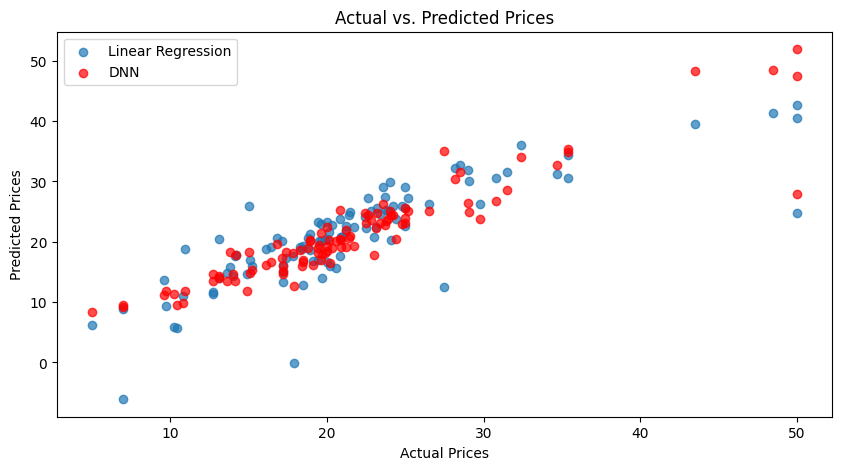

In [ ]:

# Visualization of Predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_dnn, label="DNN", alpha=0.7, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Actual vs. Predicted Prices")
plt.show()